In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from PIL import Image, ImageFilter

In [2]:
def drawGraph(G):
    pos = nx.spring_layout(G, iterations=200)
    nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
    plt.show()

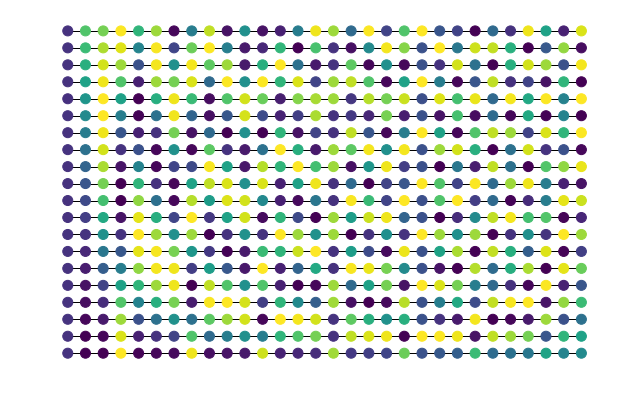

In [3]:
dim = 30
G = nx.path_graph(dim)
A = nx.adjacency_matrix(G)
degre_list = nx.degree(G)
D = np.identity(dim)
for i in range(0, dim):
    D[i,i] = degre_list[i]

    
    
L = D - A
#L = nx.laplacian_matrix(G).todense()
e_values, e_vectors = np.linalg.eigh(L)
e_vectors = np.array(e_vectors)

#print(L)
#Plot of first 20 e_vectors

pos = nx.spring_layout(G, iterations=200)
plt.figure(figsize=[8,5])
for i in range(0, 20):
    step = 0
    #for in range(0)
    pos = [(j*4, i) for j in range(0, dim) ]
    nx.draw(G, pos, node_color = e_vectors[i], node_size=100)
    #plt.show()
    
#nx.draw(G)
plt.show()
#drawGraph(G)

In [4]:
print(nx.__version__)


2.1


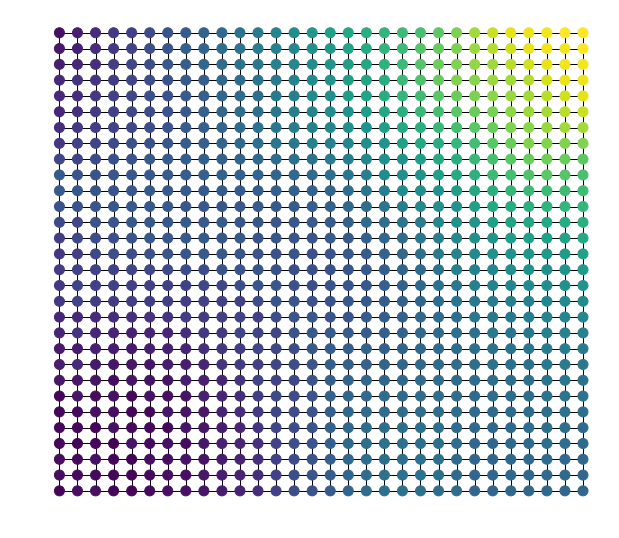

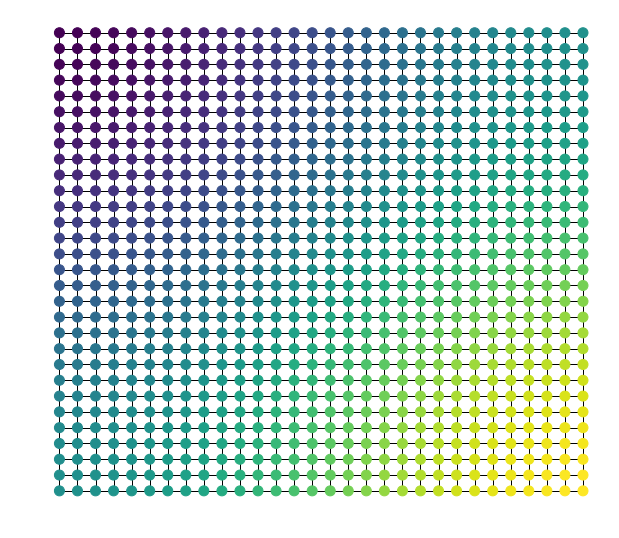

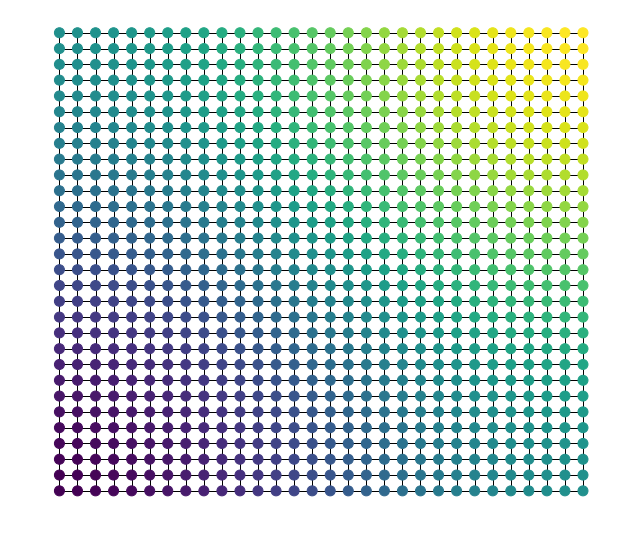

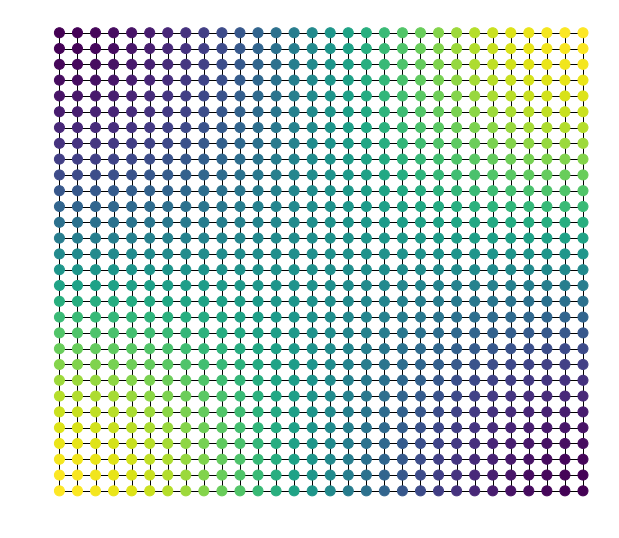

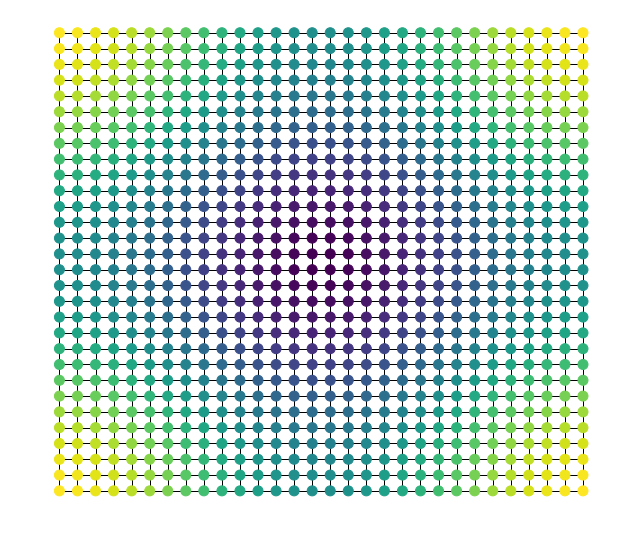

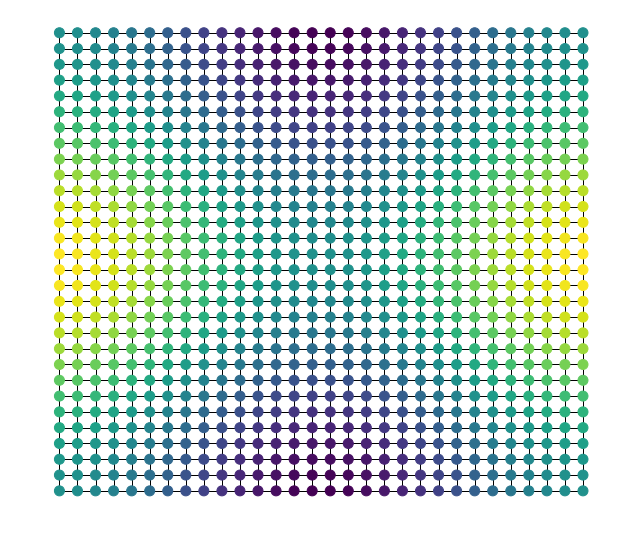

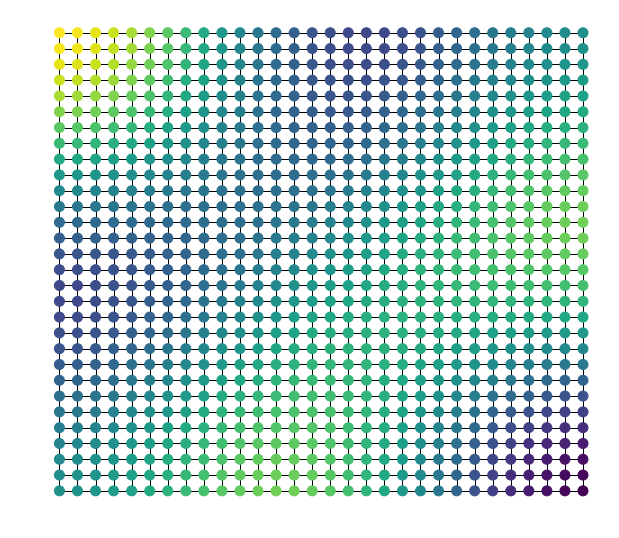

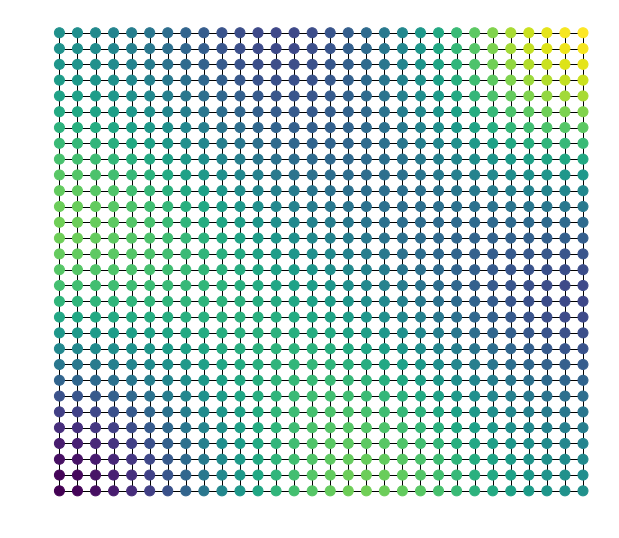

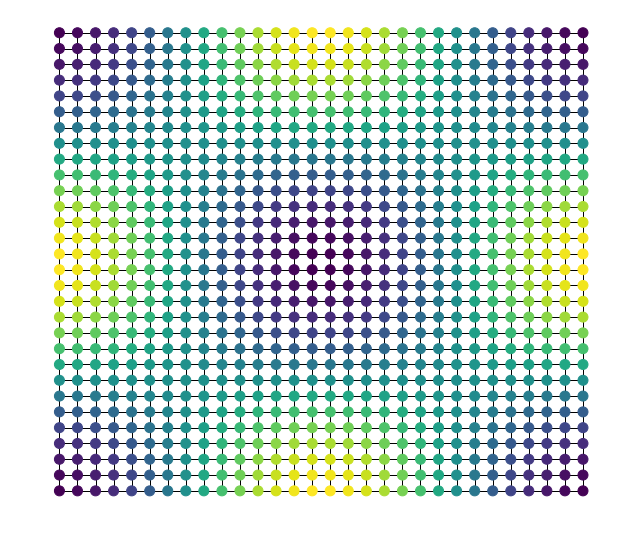

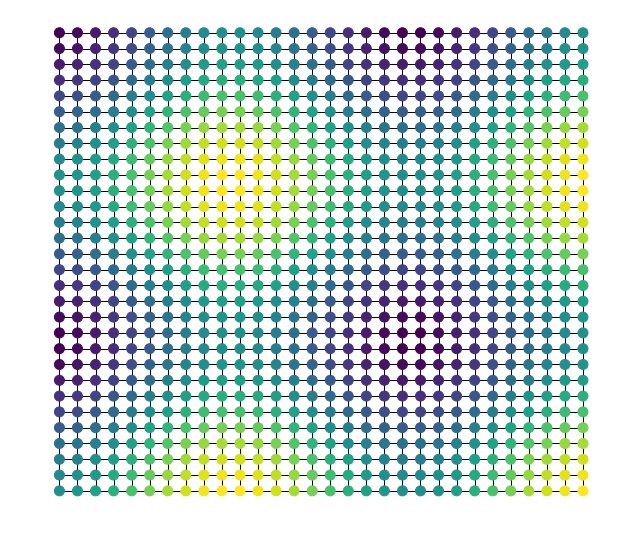

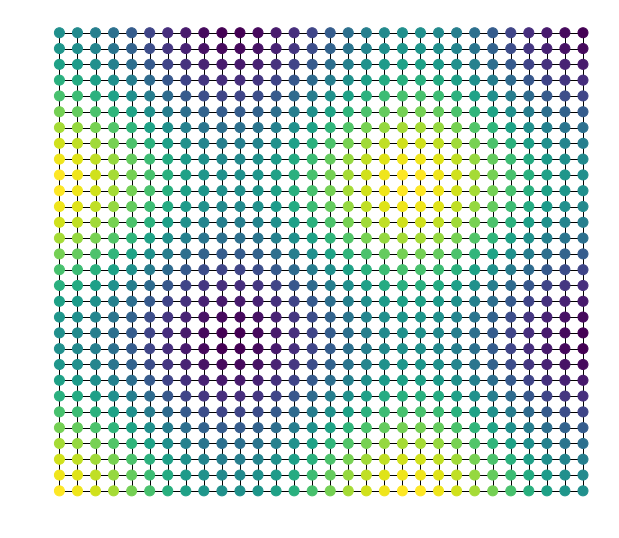

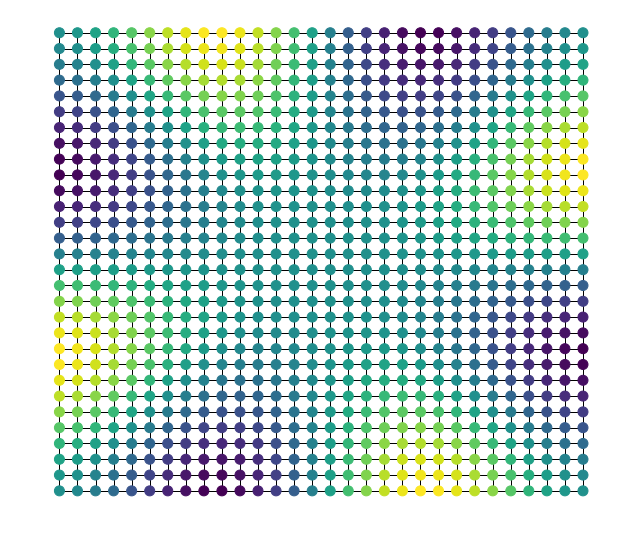

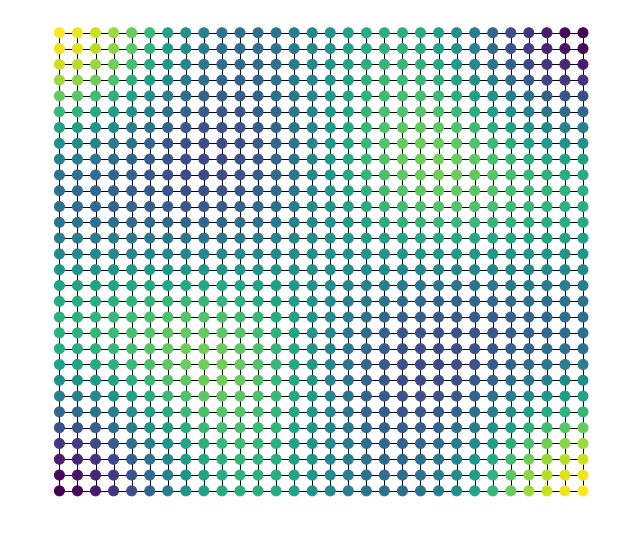

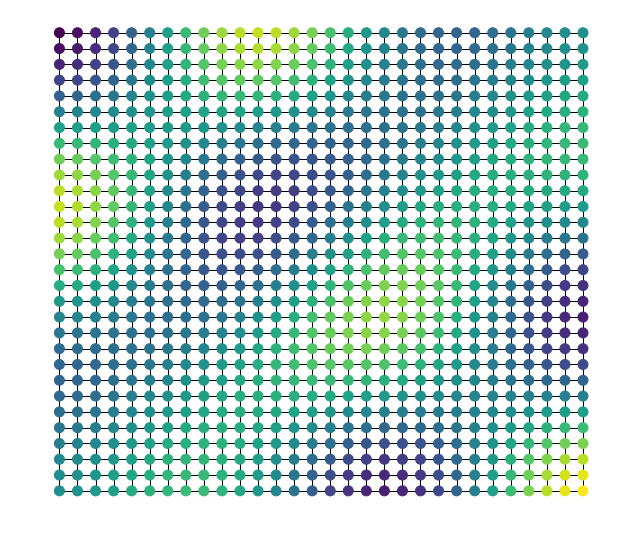

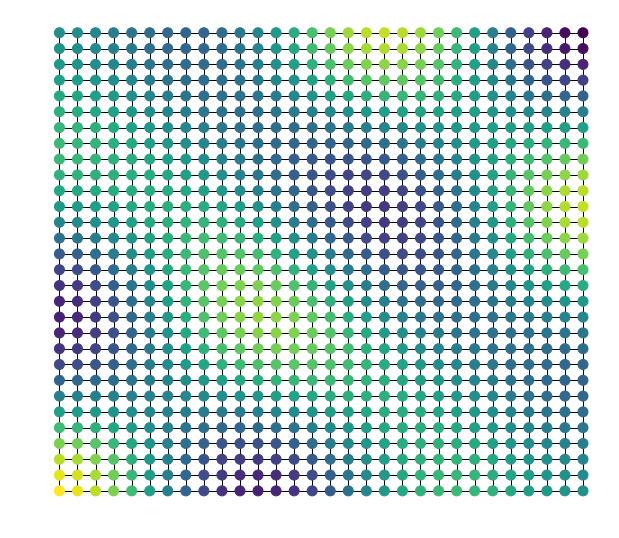

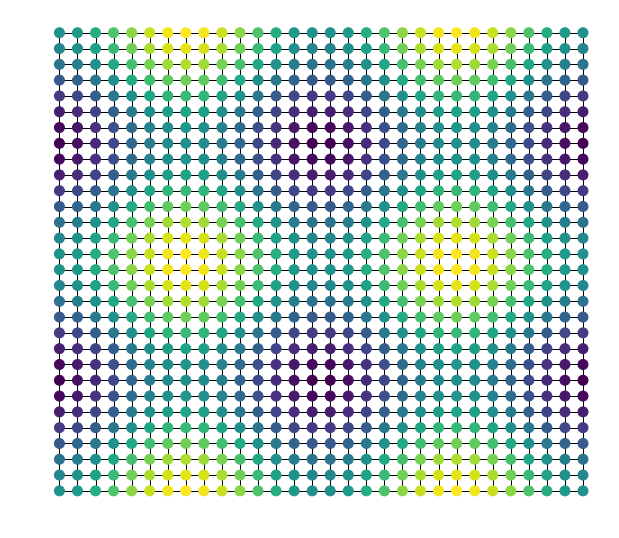

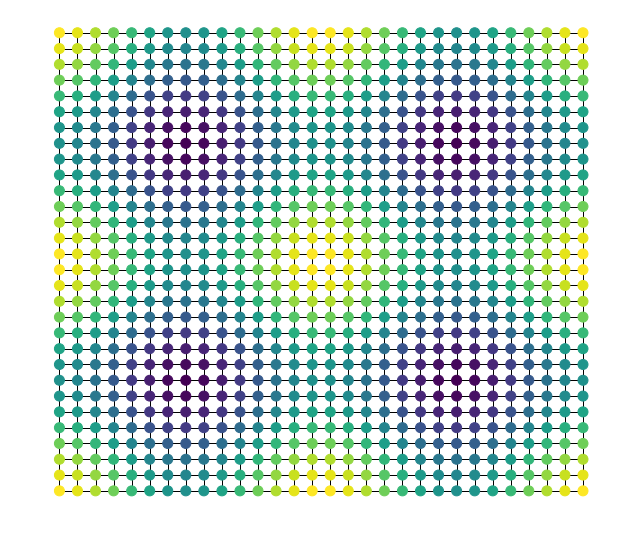

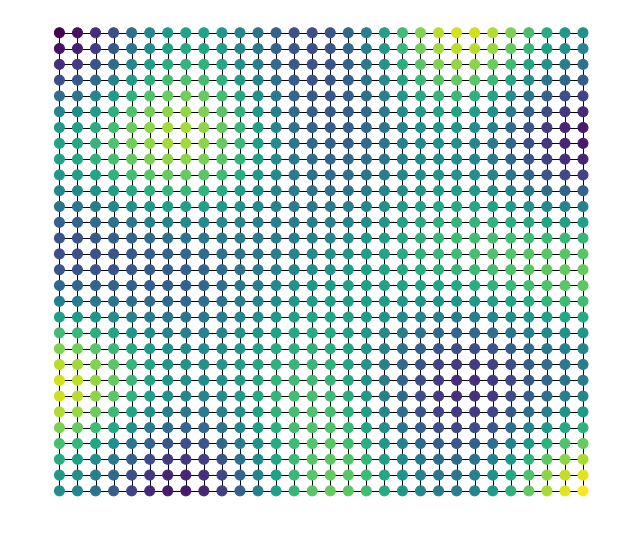

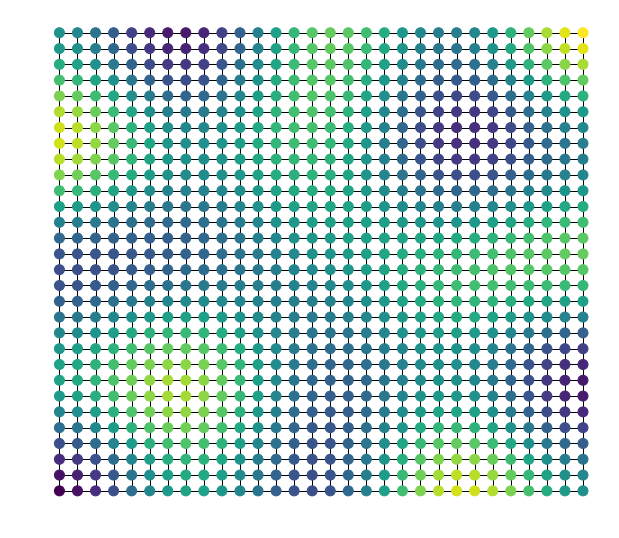

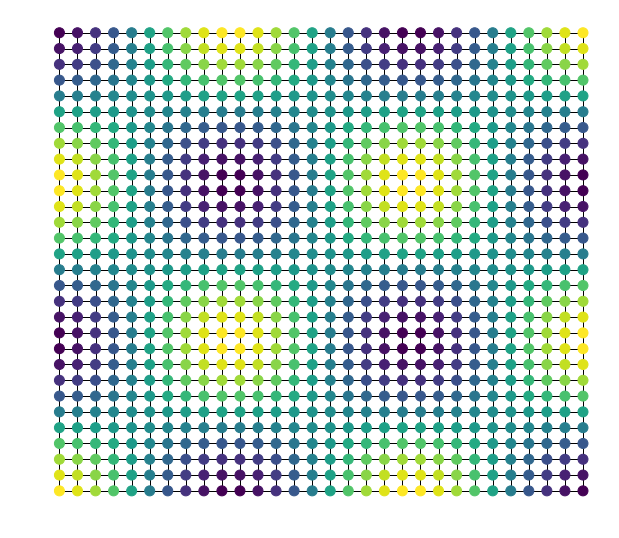

In [5]:
dim_n = 30
dim_m = 30
dim = dim_n * dim_m

G = nx.grid_2d_graph(dim_n, dim_m)
A = nx.adjacency_matrix(G)
degre_list = list(nx.degree(G))
D = np.zeros((dim, dim)) 
for i in range(0, len(degre_list)):
    node = degre_list[i]
    xy = node[0]
    D[i, i] = node[1]
L = D - A

e_values, e_vectors = np.linalg.eigh(L)
e_vectors = np.array(e_vectors)

#Plot of first 20 e_vectors

pos = nx.spring_layout(G, iterations=200)
#print(len(pos))
#print(pos)
for z in range(0, 20):
    plt.figure(figsize=[8,7])
    step = 0
    #for in range(0)
    for i in range(0, dim_n):
        for j in range(0, dim_m):
            pos[i, j] = (i*4, j*4)
    nx.draw(G, pos, node_color = e_vectors[:, z], node_size=100)
    plt.show()
    
plt.show()


In [6]:
dim_n = 150
dim_m = 150
dim = dim_n * dim_m

G = nx.grid_2d_graph(dim_n, dim_m)
A = nx.adjacency_matrix(G)
degre_list = list(nx.degree(G))
D = np.zeros((dim, dim)) 
for i in range(0, len(degre_list)):
    node = degre_list[i]
    xy = node[0]
    D[i, i] = node[1]
L = D - A

In [7]:
np.mean(L == nx.laplacian_matrix(G))

1.0

In [8]:
#e_values, e_vectors = np.linalg.eigh(L)

In [9]:
import scipy.sparse as sparse
vals, vecs = sparse.linalg.eigsh(L, k=30, which='SM')

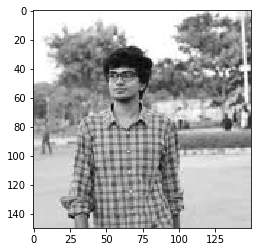

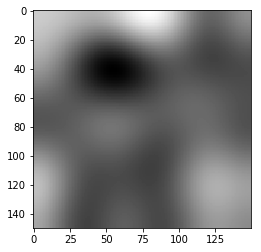

In [21]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open("picture.jpg", 'r').convert("L")
X = np.array(pil_im)
imshow(np.asarray(pil_im), cmap="gray")
plt.show()

#(22500, 1)
X = X.reshape([-1, 1])
#print(vecs[:, 1])
#U = np.array(U)
#print(U.shape)
#U = U.reshape([30, 22500])
#print(vecs.shape)
#print(X.shape)

embed = np.matmul(np.transpose(vecs), X)
#print(embed)
#print(embed.shape)
#U_t = np.transpose(U)

recon = np.matmul(vecs, embed)
#print(recon.shape)
img = recon.reshape([150, 150])
#img = np.asarray(img)
#print(img)
imshow(np.asarray(img), cmap="gray")